In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats

In [2]:
df_africa = pd.read_csv('africa-players-stats.csv')
df_africa.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Salem Boupendza Pozzi,26,839401200,1996/08/07,WC Qualification Africa,2022,Forward,Gabon,302,127,...,1.19,76,60,0,0,0.0,402,330,-1,18
1,Abass Foaud Abdourahman,22,941443200,1999/11/01,WC Qualification Africa,2022,Defender,Djibouti,128,30,...,0.00,0,32,0,0,0.0,-1,-1,-1,25
2,Abdalla Mahmoud El Said Bekhit,37,490086000,1985/07/13,WC Qualification Africa,2022,Midfielder,Egypt,225,91,...,0.80,113,45,0,0,0.0,-1,-1,-1,28
3,Abdalla Sherif,26,837673200,1996/07/18,WC Qualification Africa,2022,Forward,Libya,381,144,...,1.18,76,76,0,0,0.0,407,327,-1,21
4,Abdallah Dipo Sima,21,992761200,2001/06/17,WC Qualification Africa,2022,Forward,Senegal,69,8,...,1.30,69,35,0,0,0.0,-1,-1,-1,23


In [3]:
df_asia = pd.read_csv('asia-players-stats.csv')
df_asia.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaref Aghasi Kolahsorkhi,25,852192000,1997/01/02,WC Qualification Asia,2022,Defender,Iran,0,0,...,0.00,0,0,0,0,0.0,-1,-1,-1,-1
1,Aaref Gholami,25,861433200,1997/04/19,WC Qualification Asia,2022,Defender,Iran,49,0,...,3.67,25,49,0,0,0.0,-1,-1,-1,23
2,Aaron Mooy,31,653382000,1990/09/15,WC Qualification Asia,2022,Midfielder,Australia,704,191,...,0.51,176,64,0,0,0.0,107,242,-1,9
3,Aashish Lama,25,849427200,1996/12/01,WC Qualification Asia,2022,Forward,Nepal,46,46,...,0.00,0,46,0,0,0.0,-1,-1,-1,6
4,Abai Bokoleev,26,823334400,1996/02/03,WC Qualification Asia,2022,Forward,Kyrgyzstan,130,19,...,0.69,130,43,0,0,0.0,-1,-1,-1,9


In [4]:
df_europe = pd.read_csv('europe-players-stats.csv',sep = ';')
df_europe.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Anthony Connolly,22,949017600,28/01/2000,WC Qualification Europe,2022,Forward,Republic of Ireland,185,46,...,0.97,93,62,185,0,0.49,-1,-1,-1,20
1,Aaron Hickey,19,1023667200,10/06/2002,WC Qualification Europe,2022,Midfielder,Scotland,90,90,...,2.00,45,90,0,0,0.00,-1,-1,-1,30
2,Aaron Ramsdale,24,895104000,14/05/1998,WC Qualification Europe,2022,Goalkeeper,England,90,0,...,0.00,0,90,0,0,0.00,-1,-1,-1,19
3,Aaron Ramsey,31,662169600,26/12/1990,WC Qualification Europe,2022,Midfielder,Wales,511,341,...,0.70,128,85,511,511,0.18,59,171,-1,1
4,Aaron Sanchez Alburquerque,26,831340800,06/05/1996,WC Qualification Europe,2022,Midfielder,Andorra,245,92,...,2.20,41,49,0,0,0.00,-1,-1,-1,19


In [5]:
df_concacaf = pd.read_csv('concacaf-players-stats.csv',sep = ',')
df_concacaf.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Long,29,718848000,1992/10/12,WC Qualification CONCACAF,2022,Defender,USMNT,36,26,...,2.50,36,18,36,0,2.5,-1,-1,-1,38
1,Aarón Moises Cruz Esquivel,30,675129600,1991/05/25,WC Qualification CONCACAF,2022,Goalkeeper,Costa Rica,0,0,...,0.00,0,0,0,0,0.0,-1,-1,-1,-1
2,Aaron Pierre,29,729907200,1993/02/17,WC Qualification CONCACAF,2022,Defender,Grenada,180,90,...,1.50,60,90,0,0,0.0,-1,-1,-1,7
3,Aaron Suarez Zuñiga,19,1025136000,2002/06/27,WC Qualification CONCACAF,2022,Forward,Costa Rica,99,92,...,0.91,99,33,0,0,0.0,-1,-1,-1,16
4,Aaron Taylor-Sinclair,31,671068800,1991/04/08,WC Qualification CONCACAF,2022,Defender,Antigua and Barbuda,180,90,...,1.50,60,90,0,0,0.0,-1,-1,-1,11


In [6]:
df_sa = pd.read_csv('south-america-players-stats.csv',sep = ';')
df_sa.head()


,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Adalberto Peñaranda Maestre,25,865062000,31/05/1997,WC Qualification South America,2022,Forward,Venezuela,237,147,...,1.52,59,79,0,0,0.00,-1,-1,-1,21
1,Aderbar Melo dos Santos Neto,32,637660800,17/03/1990,WC Qualification South America,2022,Goalkeeper,Brazil,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
2,Adolfo Alejandro Muñoz Cervantes,24,881913600,12/12/1997,WC Qualification South America,2022,Midfielder,Ecuador,32,32,...,0.00,0,32,0,0,0.00,-1,-1,-1,47
3,Adrián Andrés Cubas,26,831798000,11/05/1996,WC Qualification South America,2022,Midfielder,Paraguay,379,128,...,0.71,126,76,76,0,1.19,156,155,-1,33
4,Adrian Jusino,30,710665200,09/07/1992,WC Qualification South America,2022,Midfielder,Bolivia,810,360,...,2.11,43,90,203,0,0.44,93,81,-1,28


In [7]:
#Concatenando todos os dataframes das confederações
df_final = pd.concat([df_africa,df_asia,df_europe,df_concacaf,df_sa],axis = 0)

In [8]:
df_final.head()


,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Salem Boupendza Pozzi,26,839401200,1996/08/07,WC Qualification Africa,2022,Forward,Gabon,302,127,...,1.19,76,60,0,0,0.0,402,330,-1,18
1,Abass Foaud Abdourahman,22,941443200,1999/11/01,WC Qualification Africa,2022,Defender,Djibouti,128,30,...,0.00,0,32,0,0,0.0,-1,-1,-1,25
2,Abdalla Mahmoud El Said Bekhit,37,490086000,1985/07/13,WC Qualification Africa,2022,Midfielder,Egypt,225,91,...,0.80,113,45,0,0,0.0,-1,-1,-1,28
3,Abdalla Sherif,26,837673200,1996/07/18,WC Qualification Africa,2022,Forward,Libya,381,144,...,1.18,76,76,0,0,0.0,407,327,-1,21
4,Abdallah Dipo Sima,21,992761200,2001/06/17,WC Qualification Africa,2022,Forward,Senegal,69,8,...,1.30,69,35,0,0,0.0,-1,-1,-1,23


In [9]:
df_final.shape

(7038, 47)

In [10]:
colunas = list(df_final.columns)
colunas

['full_name',
 'age',
 'birthday',
 'birthday_GMT',
 'league',
 'season',
 'position',
 'Current Club',
 'minutes_played_overall',
 'minutes_played_home',
 'minutes_played_away',
 'nationality',
 'appearances_overall',
 'appearances_home',
 'appearances_away',
 'goals_overall',
 'goals_home',
 'goals_away',
 'assists_overall',
 'assists_home',
 'assists_away',
 'penalty_goals',
 'penalty_misses',
 'clean_sheets_overall',
 'clean_sheets_home',
 'clean_sheets_away',
 'conceded_overall',
 'conceded_home',
 'conceded_away',
 'yellow_cards_overall',
 'red_cards_overall',
 'goals_involved_per_90_overall',
 'assists_per_90_overall',
 'goals_per_90_overall',
 'goals_per_90_home',
 'goals_per_90_away',
 'min_per_goal_overall',
 'conceded_per_90_overall',
 'min_per_conceded_overall',
 'min_per_match',
 'min_per_card_overall',
 'min_per_assist_overall',
 'cards_per_90_overall',
 'rank_in_league_top_attackers',
 'rank_in_league_top_midfielders',
 'rank_in_league_top_defenders',
 'rank_in_club_top_

In [11]:
#1 - Filtrando Apenas Os Paises que Estão Na Copa

df_final['Current Club'].unique()

array(['Gabon', 'Djibouti', 'Egypt', 'Libya', 'Senegal', 'Kenya',
       'Mauritania', 'Algeria', 'South Sudan', 'Sudan', 'Somalia',
       'Tanzania', 'Benin', 'Togo', 'Niger', 'Burkina', 'Ivory Coast',
       'Mali', 'Guinea', 'Ghana', 'Rwanda', 'Sierra Leone', 'Nigeria',
       'Mozambique', 'Ethiopia', 'Namibia', 'Liberia', 'Morocco',
       'Angola', 'São Tomé e Príncipe', 'Zimbabwe', 'Chad', 'Seychelles',
       'Mauritius', 'Comoros', 'Tunisia', 'Equatorial Guinea', 'Gambia',
       'Guinea-Bissau', 'Madagascar', 'Botswana', 'Zambia', 'Uganda',
       'Cameroon', 'Congo DR', 'Étoile du Congo',
       'Central African Republic', 'South Africa', 'Lesotho', 'Burundi',
       'Malawi', 'Cape Verde Islands', 'Swaziland', 'Eritrea', 'Iran',
       'Australia', 'Nepal', 'Kyrgyzstan', 'Afghanistan', 'Bahrain',
       'Iraq', 'UAE', 'Jordan', 'Palestine', 'Qatar', 'Oman', 'Kuwait',
       'Malaysia', 'Syria', 'Brunei', 'Saudi Arabia', 'Yemen', 'Pakistan',
       'Tajikistan', 'Uzbekistan

In [12]:
countries_wc = ['Argentina', 'Brazil', 'England', 'France', 'Spain', 'Belgium', 
                'Portugal', 'Germany', 'Netherlands', 'Uruguay', 'Croatia', 'Denmark',
                'Mexico', 'USMNT', 'Senegal', 'Wales', 'Poland', 'Australia', 'Japan', 'Morocco', 
                'Switzerland', 'Ghana', 'South Korea', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 
                'Tunisia', 'Saudi Arabia', 'Iran', 'Ecuador','Qatar']

In [13]:
df_final = df_final[df_final['Current Club'].isin(countries_wc)]
df_final.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
4,Abdallah Dipo Sima,21,992761200,2001/06/17,WC Qualification Africa,2022,Forward,Senegal,69,8,...,1.30,69,35,0,0,0.00,-1,-1,-1,23
15,Abdou Diallo,26,831193200,1996/05/04,WC Qualification Africa,2022,Defender,Senegal,374,180,...,0.96,94,75,374,0,0.24,92,404,95,10
34,Abdoulaye Seck,30,707641200,1992/06/04,WC Qualification Africa,2022,Defender,Senegal,2,2,...,0.00,0,2,0,0,0.00,-1,-1,-1,20
37,Abdul Fatawu Issahaku,18,1078732800,2004/03/08,WC Qualification Africa,2022,Forward,Ghana,228,169,...,0.79,114,57,0,0,0.00,-1,-1,-1,7
39,Abdul Manaf Nurudeen,23,918460800,1999/02/08,WC Qualification Africa,2022,Goalkeeper,Ghana,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [14]:
df = df_final.copy()

In [15]:
#Deletando as Colunas 'birthday', 'birthday_GMT' , 'league', 'season'

#As colunas 'birthday', 'birthday_GMT' são  redundantes 
#As colunas 'league', 'season' são irrelevantes

df_final = df_final.drop(columns = ['birthday', 'birthday_GMT' , 'league', 'season'])
df_final.head()

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
4,Abdallah Dipo Sima,21,Forward,Senegal,69,8,61,Senegal,2,1,...,1.30,69,35,0,0,0.00,-1,-1,-1,23
15,Abdou Diallo,26,Defender,Senegal,374,180,194,France,5,2,...,0.96,94,75,374,0,0.24,92,404,95,10
34,Abdoulaye Seck,30,Defender,Senegal,2,2,0,Senegal,1,1,...,0.00,0,2,0,0,0.00,-1,-1,-1,20
37,Abdul Fatawu Issahaku,18,Forward,Ghana,228,169,59,Ghana,4,2,...,0.79,114,57,0,0,0.00,-1,-1,-1,7
39,Abdul Manaf Nurudeen,23,Goalkeeper,Ghana,0,0,0,Ghana,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


# Análise Exploratória - Início



In [16]:
# 2 - Captando o descritivo do dataframe
df_final.describe()

,age,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,...,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,27.144315,279.303207,141.027697,138.275510,4.289359,2.177114,2.112245,0.605685,0.349854,0.255831,...,0.454716,100.551749,47.553936,108.607872,83.343294,0.117194,80.341108,75.966472,5.998542,14.939504
std,4.116415,319.793843,169.320724,163.883931,4.049667,2.141249,2.097325,1.434613,0.923820,0.709014,...,0.744727,135.194755,33.108369,225.552812,212.056860,0.349918,160.016056,159.646648,23.276726,12.610937
min,17.000000,-17.000000,-2.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,24.000000,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,3.000000
50%,27.000000,161.000000,86.500000,90.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.250000,49.500000,53.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,14.000000
75%,30.000000,445.250000,236.000000,224.500000,7.000000,3.000000,3.000000,1.000000,0.000000,0.000000,...,0.660000,161.000000,79.000000,125.500000,0.000000,0.130000,102.000000,79.500000,-1.000000,25.000000
max,40.000000,1530.000000,810.000000,810.000000,19.000000,10.000000,9.000000,13.000000,9.000000,7.000000,...,10.000000,1071.000000,93.000000,1523.000000,1530.000000,7.500000,760.000000,763.000000,211.000000,49.000000


In [17]:
#Temos 2 casos com minutos negativos. Estes casos serão deletados da base
df_final[(df_final['minutes_played_overall'] <  0)]

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
566,Hashim Ali Abdullatif,22,Midfielder,Qatar,-13,0,-13,Qatar,0,0,...,0.0,0,0,0,0,0.0,-1,-1,-1,-1
2148,William Silva de Carvalho,30,Midfielder,Portugal,-17,-2,-15,Portugal,3,3,...,0.0,0,0,0,-17,0.0,-1,-1,-1,-1


In [18]:
df_final = df_final[df_final['minutes_played_overall'] >  0]
df_final = df_final[df_final['minutes_played_away'] >  0]

In [19]:
#Levantando agora um novo describe dos dados
df_final.describe()


,age,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,27.143870,379.946302,187.683891,192.262411,5.770010,2.842958,2.927052,0.831814,0.477204,0.354610,...,0.582107,136.515704,60.341439,150.323202,114.945289,0.148369,111.470111,105.532928,8.728470,17.980750
std,3.960194,324.408340,176.832765,164.155943,3.839159,2.136958,1.933674,1.632604,1.056342,0.814353,...,0.768205,142.616461,25.195220,253.870297,242.622038,0.316136,178.800227,179.494528,26.958823,11.206735
min,17.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,24.000000,111.500000,39.000000,71.500000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,8.000000
50%,27.000000,299.000000,150.000000,153.000000,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.420000,109.000000,65.000000,0.000000,0.000000,0.000000,7.000000,6.000000,-1.000000,17.000000
75%,30.000000,558.000000,270.000000,270.000000,8.000000,4.000000,4.000000,1.000000,1.000000,0.000000,...,0.800000,203.000000,83.000000,245.000000,117.000000,0.200000,160.500000,134.000000,-1.000000,27.000000
max,40.000000,1530.000000,810.000000,810.000000,19.000000,10.000000,9.000000,13.000000,9.000000,7.000000,...,10.000000,1071.000000,93.000000,1523.000000,1530.000000,4.090000,760.000000,763.000000,211.000000,48.000000


# Neste estudo, decidi não deletar outliers pelo simples fato de compreender que no futebol casos "fora da média" ocorrem, como em gols marcados e em número de assistências, e que estes casos serão importantes na definição dos perfís

In [20]:
df_final.shape

(987, 43)

In [21]:
# 3 - Contando linhas Null
df_final.isnull().count()

#Sem linhas null !!

full_name                         987
age                               987
position                          987
Current Club                      987
minutes_played_overall            987
minutes_played_home               987
minutes_played_away               987
nationality                       987
appearances_overall               987
appearances_home                  987
appearances_away                  987
goals_overall                     987
goals_home                        987
goals_away                        987
assists_overall                   987
assists_home                      987
assists_away                      987
penalty_goals                     987
penalty_misses                    987
clean_sheets_overall              987
clean_sheets_home                 987
clean_sheets_away                 987
conceded_overall                  987
conceded_home                     987
conceded_away                     987
yellow_cards_overall              987
red_cards_ov

In [22]:
# Verificando se há duplicidade de linhas 

df_final.duplicated().sum()

0

In [23]:
df_final.dtypes


full_name                          object
age                                 int64
position                           object
Current Club                       object
minutes_played_overall              int64
minutes_played_home                 int64
minutes_played_away                 int64
nationality                        object
appearances_overall                 int64
appearances_home                    int64
appearances_away                    int64
goals_overall                       int64
goals_home                          int64
goals_away                          int64
assists_overall                     int64
assists_home                        int64
assists_away                        int64
penalty_goals                       int64
penalty_misses                      int64
clean_sheets_overall                int64
clean_sheets_home                   int64
clean_sheets_away                   int64
conceded_overall                    int64
conceded_home                     

# Dic Dados
full_name  -	Nome Do Jogador 

age	- Idade do Jogador

league	- Liga aonde joga

season	- Temporada

position - Posição

current_club -	Nome do Time

minutes_played (Overall / Home / Away)	 - Minutos Jogados na Temporada (Ao Todo/Em Casa/Fora)

nationality	- Nacionalidade

appearances (Overall / Home / Away)	- Partidas Jogadas	(Ao Todo/Em Casa/Fora)

goals  (Overall / Home / Away) - Gols (Ao Todo/Em Casa/Fora)

assists	(Overall / Home / Away)  - Assistencias na Temporada (Ao Todo/Em Casa/Fora)

penalty_goals - Gols de penalties marcados

penalty_misses - Penalties perdidos

clean_sheets (Overall / Home / Away)  -	Jogos sem tomar gols (apenas para goleiros)  (Ao Todo/Em Casa/Fora)

conceded (Overall / Home / Away) - Gols Tomadas (apenas para goleiros)  (Ao Todo/Em Casa/Fora)

yellow_cards_overall - Cartões Amarelos Tomados

red_cards_overall -	Cartões Vermelhos Tomados

goals_involved_per_90_overall - Participações em gols a cada 90 minutos

goals_per_90 (Overall / Home / Away) -	Gols marcados a cada 90 minutos  (Ao Todo/Em Casa/Fora)

conceded_per_90  (Overall / Home / Away)	- Gols concedidos a cada 90 minutos (apenas para goleiros)  (Ao Todo/Em Casa/Fora)

cards_per_90  (Overall / Home / Away) - Cartões tomados a cada 90 minutos (Ao Todo/Em Casa/Fora) 

min_per_match (Overall / Home / Away) -	Média de minutos jogados por partida (Ao Todo/Em Casa/Fora)

min_per_assist (Overall / Home / Away) - Média de assistencias por minuto jogado (Ao Todo/Em Casa/Fora)	

rank_in_league_top_attackers -	Posição no ranking de atacantes da liga

rank_in_league_top_midfielders	- Posição no Ranking de meio campistas da liga

rank_in_league_top_defenders -	Posição no Ranking de defensores da liga

rank_in_club_top_scorer	Scoring - Posição no Ranking de Artilharia


In [24]:
#3 - Colocando as imagens em ranges

df_final.groupby(['age'])['age'].count()


age
17     2
18     2
19    13
20    16
21    37
22    37
23    77
24    87
25    97
26    93
27    83
28    77
29    86
30    84
31    55
32    52
33    26
34    22
35    22
36    10
37     2
38     3
39     3
40     1
Name: age, dtype: int64

# Criando tabela de frequência - Idade

In [25]:
df_idade = pd.DataFrame(df_final.groupby(['age'])['age'].count())
df_idade = df_idade.rename(columns={'age': 'Frequencia'})
df_idade['Freq_Relativa']= round((df_idade['Frequencia']/987)*100,2)
df_idade.reset_index(inplace = True)

df_idade

,age,Frequencia,Freq_Relativa
0,17,2,0.20
1,18,2,0.20
2,19,13,1.32
3,20,16,1.62
4,21,37,3.75
5,22,37,3.75
6,23,77,7.80
7,24,87,8.81
8,25,97,9.83
9,26,93,9.42


In [26]:
#Calculando a frequencia acumulada da idade
df_idade['Freq_Accum'] = df_idade['Frequencia'].cumsum() 
df_idade

,age,Frequencia,Freq_Relativa,Freq_Accum
0,17,2,0.20,2
1,18,2,0.20,4
2,19,13,1.32,17
3,20,16,1.62,33
4,21,37,3.75,70
5,22,37,3.75,107
6,23,77,7.80,184
7,24,87,8.81,271
8,25,97,9.83,368
9,26,93,9.42,461


In [27]:
# Calculando a Frequencia Relativa Acumulada
df_idade['Freq_Accum_Percent'] = round((df_idade['Freq_Accum']/987) * 100,2)


df_idade

,age,Frequencia,Freq_Relativa,Freq_Accum,Freq_Accum_Percent
0,17,2,0.20,2,0.20
1,18,2,0.20,4,0.41
2,19,13,1.32,17,1.72
3,20,16,1.62,33,3.34
4,21,37,3.75,70,7.09
5,22,37,3.75,107,10.84
6,23,77,7.80,184,18.64
7,24,87,8.81,271,27.46
8,25,97,9.83,368,37.28
9,26,93,9.42,461,46.71


# - 80 % dos jogadores tem idade até 30 anos
# - 34% dos jogadores tem idade entre 20 e 25 anos
# - Somente 15% dos jogadores tem mais de 30 anos
# - A maioria dos jogadores (9,87%) tem 25 anos

# Início da Construção do Modelo

#Premissas Adotadas:

Classificar os jogadores com seu poder de decisão com base nas seguintes variàveis:

- Gols marcados e comparação gols fora x casa
- Idade
- Gols a cada 90 minutos
- Gols Totais
- Número de Assitencias Total
- Minutos Por Partida
- Minutos Totais
- Partidas Jogadas
- Média de assistencias por minuto jogado 
- Cartões Amarelos e Vermelhos tomados

- Outliers não serão descartados

# Premissa 1 - Idade

<AxesSubplot:>

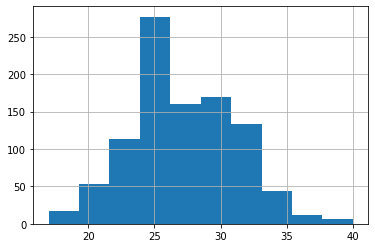

In [28]:
df_final['age'].hist()

#A maioria dos jogadores possuí 25 anos 
#A maioria está no range de 25 à 30 anos

In [29]:
# Criando range por faixa de idade, com intervalos de 5 em 4 anos
bins = [15,20,25,30,35,40,45]
df_final['Faixa_Idade']= pd.cut(df_final['age'], bins)

In [30]:
df_final[['full_name','age','Faixa_Idade']].head()

,full_name,age,Faixa_Idade
4,Abdallah Dipo Sima,21,"(20, 25]"
15,Abdou Diallo,26,"(25, 30]"
37,Abdul Fatawu Issahaku,18,"(15, 20]"
41,Abdul Rahman Baba,28,"(25, 30]"
60,Achraf Bencharki,27,"(25, 30]"


In [31]:
#Passo 2 :
#Aplicando Label Encoding nas Faixas de Idade

df_final.Faixa_Idade.value_counts()

(25, 30]    423
(20, 25]    335
(30, 35]    177
(15, 20]     33
(35, 40]     19
(40, 45]      0
Name: Faixa_Idade, dtype: int64

In [32]:
#Instanciando o Label Encoder
le = LabelEncoder()

In [33]:
le.fit(df_final.Faixa_Idade)

LabelEncoder()

In [34]:
list(le.classes_)

[Interval(15, 20, closed='right'),
 Interval(20, 25, closed='right'),
 Interval(25, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right')]

In [35]:
# Aplicando  Label Encoder na Variavel "Faixa Idade"
df_final.Faixa_Idade = le.transform(df_final.Faixa_Idade)

df = df_final.copy()

In [36]:
df_final

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Faixa_Idade
4,Abdallah Dipo Sima,21,Forward,Senegal,69,8,61,Senegal,2,1,...,69,35,0,0,0.00,-1,-1,-1,23,1
15,Abdou Diallo,26,Defender,Senegal,374,180,194,France,5,2,...,94,75,374,0,0.24,92,404,95,10,2
37,Abdul Fatawu Issahaku,18,Forward,Ghana,228,169,59,Ghana,4,2,...,114,57,0,0,0.00,-1,-1,-1,7,0
41,Abdul Rahman Baba,28,Defender,Ghana,450,270,180,Ghana,5,3,...,225,90,0,0,0.00,236,199,32,34,2
60,Achraf Bencharki,27,Forward,Morocco,28,20,8,Morocco,4,3,...,0,7,0,0,0.00,-1,-1,-1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,Thiago Silva,38,Defender,Brazil,900,521,379,Brazil,11,6,...,180,82,900,0,0.10,174,182,18,31,4
516,Vinícius José Paixão de Oliveira Júnior,22,Forward,Brazil,406,180,226,Brazil,7,3,...,0,58,203,0,0.44,47,114,-1,11,1
519,Wellington Moisés Ramírez Preciado,22,Goalkeeper,Ecuador,180,90,90,Ecuador,2,1,...,90,90,0,0,0.00,-1,-1,-1,21,1
520,Weverton Pereira da Silva,34,Goalkeeper,Brazil,360,180,180,Brazil,4,2,...,180,90,0,0,0.00,181,180,19,26,3


# Premissa 2 - Gols

# Quais são as posições que mais marcam gols? E as que dão mais assistências?



In [37]:
df_position = df_final[['position','goals_overall','goals_home','goals_away','assists_overall','assists_home','assists_away']].groupby(['position']).sum()

In [38]:
position = list(df_position.index)
goals_overall = list(df_position['goals_overall'])

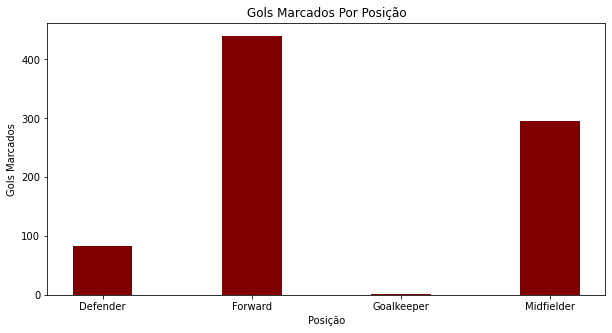

In [39]:
fig = plt.figure(figsize = (10, 5))

plt.bar(position, goals_overall, color ='maroon',
        width = 0.4)

plt.xlabel('Posição')
plt.ylabel('Gols Marcados')
plt.title('Gols Marcados Por Posição')

plt.show()

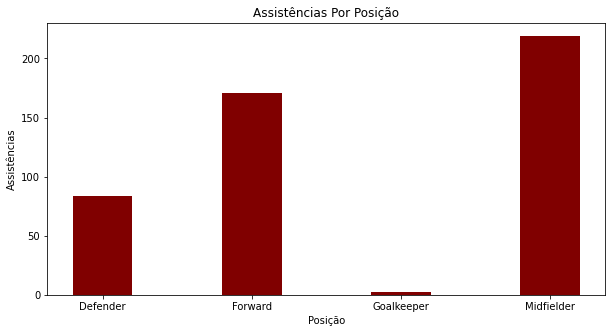

In [40]:
assist_overall = list(df_position['assists_overall'])

fig = plt.figure(figsize = (10, 5))

plt.bar(position, assist_overall, color ='maroon',
        width = 0.4)

plt.xlabel('Posição')
plt.ylabel('Assistências')
plt.title('Assistências Por Posição')

plt.show()

In [41]:
# Afinal, quem que foi o goleiro que marcou gol???
df_final[(df_final['position'] == 'Goalkeeper') & (df_final['goals_overall'] > 0)][['full_name','position','Current Club','goals_overall']]

,full_name,position,Current Club,goals_overall
461,Danny Ward,Goalkeeper,Wales,1
595,Leonel Moreira Ledezma,Goalkeeper,Costa Rica,1


# Aplicando padronização nos campos 'assists_per_90_overall' , 'goals_involved_per_90_overall',  'min_per_assist_overall' e 'assists_overall', todas variáveis ligadas a assistências

In [42]:

df_final['assists_per_90_overall'] = StandardScaler().fit_transform(df_final['assists_per_90_overall'].values.reshape(len(df_final),1))
df_final['goals_involved_per_90_overall'] = StandardScaler().fit_transform(df_final['goals_involved_per_90_overall'].values.reshape(len(df_final),1))
df_final['assists_overall'] = StandardScaler().fit_transform(df_final['assists_overall'].values.reshape(len(df_final),1))


In [43]:
df_final['min_per_assist_overall'] = StandardScaler().fit_transform(df_final['min_per_assist_overall'].values.reshape(len(df_final),1))


In [44]:
df_final[['full_name','assists_per_90_overall' , 'goals_involved_per_90_overall', 'assists_overall', 'min_per_assist_overall']]

,full_name,assists_per_90_overall,goals_involved_per_90_overall,assists_overall,min_per_assist_overall
4,Abdallah Dipo Sima,-0.372377,-0.508058,-0.503800,-0.474003
15,Abdou Diallo,-0.372377,-0.162109,-0.503800,-0.474003
37,Abdul Fatawu Issahaku,-0.372377,-0.508058,-0.503800,-0.474003
41,Abdul Rahman Baba,-0.372377,-0.508058,-0.503800,-0.474003
60,Achraf Bencharki,-0.372377,-0.508058,-0.503800,-0.474003
...,...,...,...,...,...
508,Thiago Silva,-0.372377,-0.508058,-0.503800,-0.474003
516,Vinícius José Paixão de Oliveira Júnior,-0.372377,-0.190938,-0.503800,-0.474003
519,Wellington Moisés Ramírez Preciado,-0.372377,-0.508058,-0.503800,-0.474003
520,Weverton Pereira da Silva,-0.372377,-0.508058,-0.503800,-0.474003


In [45]:
df_final.groupby(['goals_overall'])['goals_overall'].count()

goals_overall
0     623
1     185
2      81
3      40
4      14
5      17
6       9
7       6
8       4
9       2
10      3
12      2
13      1
Name: goals_overall, dtype: int64

# Qual jogador marcou mais gols?


In [46]:
df_players = df_final[['full_name','goals_overall']].groupby(['full_name']).sum().sort_values(['goals_overall'],ascending=False)

In [47]:
#Ordenando por Gols Marcados
df_players.reset_index(inplace = True)
df_players.head()

,full_name,goals_overall
0,Cyle Larin,13
1,Harry Kane,12
2,Memphis Depay,12
3,Takumi Minamino,10
4,Yūya Ōsako,10


In [48]:
name = list(df_players['full_name'][:10])
goals = list(df_players['goals_overall'][:10])

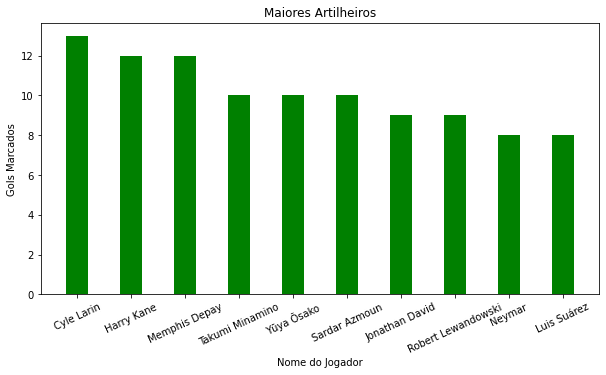

In [49]:
fig = plt.figure(figsize = (10, 5))


plt.bar(name, goals,color = 'green',width = 0.4)
plt.xticks(rotation = 25) 
plt.xlabel('Nome do Jogador')
plt.ylabel('Gols Marcados')
plt.title('Maiores Artilheiros')

plt.show()

# E as seleções mais artilheiras?

In [50]:
df_club = df_final[['Current Club','goals_overall']].groupby(['Current Club']).sum().sort_values(['goals_overall'],ascending=False)
df_club.reset_index(inplace=True)

In [51]:
club = list(df_club['Current Club'][:10])
goals = list(df_club['goals_overall'][:10])

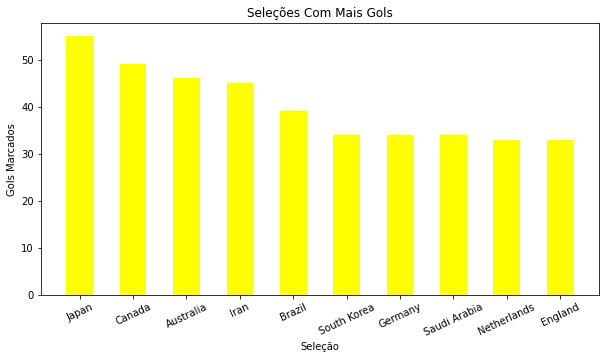

In [52]:
fig = plt.figure(figsize = (10, 5))

plt.bar(club, goals, color = 'yellow',width = 0.5)
plt.xticks(rotation = 25) 
plt.xlabel('Seleção')
plt.ylabel('Gols Marcados')
plt.title('Seleções Com Mais Gols')

plt.show()

# Aplicando padronização na variável 'goals_overall'

In [53]:


df_final['goals_overall'] = StandardScaler().fit_transform(df_final['goals_overall'].values.reshape(len(df_final),1))

In [54]:
df_final[['full_name','goals_overall']].head(10)

,full_name,goals_overall
4,Abdallah Dipo Sima,-0.509759
15,Abdou Diallo,0.103069
37,Abdul Fatawu Issahaku,-0.509759
41,Abdul Rahman Baba,-0.509759
60,Achraf Bencharki,-0.509759
61,Achraf Hakimi Mouh,0.715898
62,Adam Masina,-0.509759
110,Aïssa Bilal Laïdouni,0.103069
127,Alexander Djiku,-0.509759
145,Ali Maâloul,0.103069


# Criando uma flag para indicar se o jogador marcou mais gols fora ou dentro de casa e aplicando "One Hot Encoding"

In [55]:

df_final['Gols_Comparativo'] = np.where(df_final['goals_away'] > df_final['goals_home'], 'Mais Gols Fora', 'Mais Gols Em Casa')

In [56]:
df_final['Gols_Comparativo'].unique()

array(['Mais Gols Em Casa', 'Mais Gols Fora'], dtype=object)

In [57]:
#Aplicando One Hot Encoding na coluna 'Gols_Comparativo'


#Usando a ferramenta "Get Dummmies" para criar as variáveis
one_hot = pd.get_dummies(df_final['Gols_Comparativo'],prefix = 'Gols_Comparativo')
one_hot

,Gols_Comparativo_Mais Gols Em Casa,Gols_Comparativo_Mais Gols Fora
4,1,0
15,1,0
37,1,0
41,1,0
60,1,0
...,...,...
508,1,0
516,1,0
519,1,0
520,1,0


In [58]:
# Unindo as variáveis dummies ao dataframe pelo index
df_final = pd.concat([df_final,one_hot],axis=1)
df_final

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Faixa_Idade,Gols_Comparativo,Gols_Comparativo_Mais Gols Em Casa,Gols_Comparativo_Mais Gols Fora
4,Abdallah Dipo Sima,21,Forward,Senegal,69,8,61,Senegal,2,1,...,-0.474003,0.00,-1,-1,-1,23,1,Mais Gols Em Casa,1,0
15,Abdou Diallo,26,Defender,Senegal,374,180,194,France,5,2,...,-0.474003,0.24,92,404,95,10,2,Mais Gols Em Casa,1,0
37,Abdul Fatawu Issahaku,18,Forward,Ghana,228,169,59,Ghana,4,2,...,-0.474003,0.00,-1,-1,-1,7,0,Mais Gols Em Casa,1,0
41,Abdul Rahman Baba,28,Defender,Ghana,450,270,180,Ghana,5,3,...,-0.474003,0.00,236,199,32,34,2,Mais Gols Em Casa,1,0
60,Achraf Bencharki,27,Forward,Morocco,28,20,8,Morocco,4,3,...,-0.474003,0.00,-1,-1,-1,30,2,Mais Gols Em Casa,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,Thiago Silva,38,Defender,Brazil,900,521,379,Brazil,11,6,...,-0.474003,0.10,174,182,18,31,4,Mais Gols Em Casa,1,0
516,Vinícius José Paixão de Oliveira Júnior,22,Forward,Brazil,406,180,226,Brazil,7,3,...,-0.474003,0.44,47,114,-1,11,1,Mais Gols Em Casa,1,0
519,Wellington Moisés Ramírez Preciado,22,Goalkeeper,Ecuador,180,90,90,Ecuador,2,1,...,-0.474003,0.00,-1,-1,-1,21,1,Mais Gols Em Casa,1,0
520,Weverton Pereira da Silva,34,Goalkeeper,Brazil,360,180,180,Brazil,4,2,...,-0.474003,0.00,181,180,19,26,3,Mais Gols Em Casa,1,0


In [59]:
#Deletando as colunas 'goals_away' e 'goals_home'
df_final = df_final.drop(columns = ['goals_away' ,'goals_home'])

In [60]:
#Deletando as colunas 'Gols Comparativo'
df_final = df_final.drop(columns = ['Gols_Comparativo'])

In [61]:
#Aplicando normalização na variável 'goals_per_90_overall' ( gols por 90 min )e 'goals_involved_per_90_overall' (participações em gols por 90 min)

df_final['goals_involved_per_90_overall'] = StandardScaler().fit_transform(df_final['goals_involved_per_90_overall'].values.reshape(len(df_final),1))

In [62]:
df_final['goals_per_90_overall'] = StandardScaler().fit_transform(df_final['goals_per_90_overall'].values.reshape(len(df_final),1))

# Premissa 4 - Minutos Jogados


In [63]:
#Quem jogou mais minutos:
df_minutos = df_final[['full_name','minutes_played_overall']].groupby(['full_name']).sum().sort_values(['minutes_played_overall'],ascending = False)

In [64]:
df_minutos.reset_index(inplace=True)
df_minutos

,full_name,minutes_played_overall
0,Mathew Ryan,1530
1,Mohammadhossein Kanani Zadegan,1523
2,Diego Godín,1518
3,Pervis Josué Estupiñán Tenorio,1514
4,Jackson Irvine,1411
...,...,...
982,Juan Ramón Cazares Sevillano,6
983,Mortadha Ben Ouannes,5
984,Jordan Lotomba,4
985,Ashkan Dejagah,3


In [65]:
name = list(df_minutos['full_name'][:10])
minutes = list(df_minutos['minutes_played_overall'][:10])

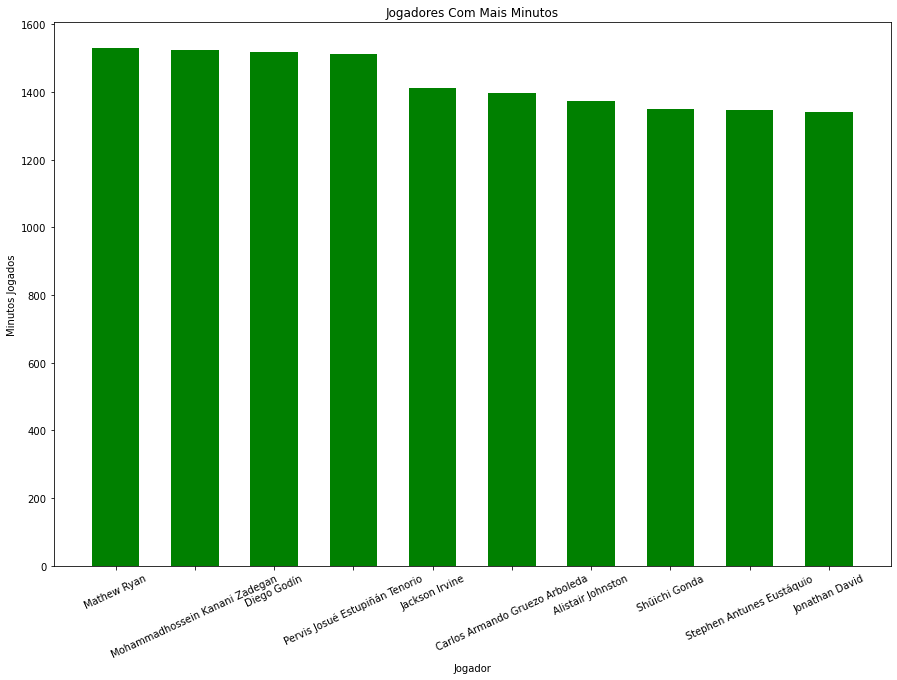

In [66]:
fig = plt.figure(figsize=(15,10))


plt.bar(name, minutes ,color = 'green',width = 0.6)
plt.xticks(rotation = 25)
plt.xlabel('Jogador')
plt.ylabel('Minutos Jogados')
plt.title('Jogadores Com Mais Minutos')

plt.show()

In [67]:
#Aplicando padronização em 'minutes_played_overall'

df_final['minutes_played_overall'] = StandardScaler().fit_transform(df_final['minutes_played_overall'].values.reshape(len(df_final),1))

In [68]:
df_final[['full_name','minutes_played_overall']]

,full_name,minutes_played_overall
4,Abdallah Dipo Sima,-0.958989
15,Abdou Diallo,-0.018339
37,Abdul Fatawu Issahaku,-0.468617
41,Abdul Rahman Baba,0.216052
60,Achraf Bencharki,-1.085437
...,...,...
508,Thiago Silva,1.603896
516,Vinícius José Paixão de Oliveira Júnior,0.080352
519,Wellington Moisés Ramírez Preciado,-0.616654
520,Weverton Pereira da Silva,-0.061516


In [69]:
#Aplicando padronização em 'min_per_match' - Minutos Por Partida

df_final['min_per_match'] = StandardScaler().fit_transform(df_final['min_per_match'].values.reshape(len(df_final),1))

In [70]:
df_final[['full_name','min_per_match']]

,full_name,min_per_match
4,Abdallah Dipo Sima,-1.006313
15,Abdou Diallo,0.582094
37,Abdul Fatawu Issahaku,-0.132689
41,Abdul Rahman Baba,1.177747
60,Achraf Bencharki,-2.118199
...,...,...
508,Thiago Silva,0.860066
516,Vinícius José Paixão de Oliveira Júnior,-0.092979
519,Wellington Moisés Ramírez Preciado,1.177747
520,Weverton Pereira da Silva,1.177747


# Premissa 5 - Partidas Jogadas

In [71]:
#Quem jogou mais minutos:
df_app = df_final[['full_name','appearances_overall']].groupby(['full_name']).sum().sort_values(['appearances_overall'],ascending = False)
df_app.reset_index(inplace = True)

In [72]:
name = list(df_app['full_name'][:10])
app = list(df_app['appearances_overall'][:10])

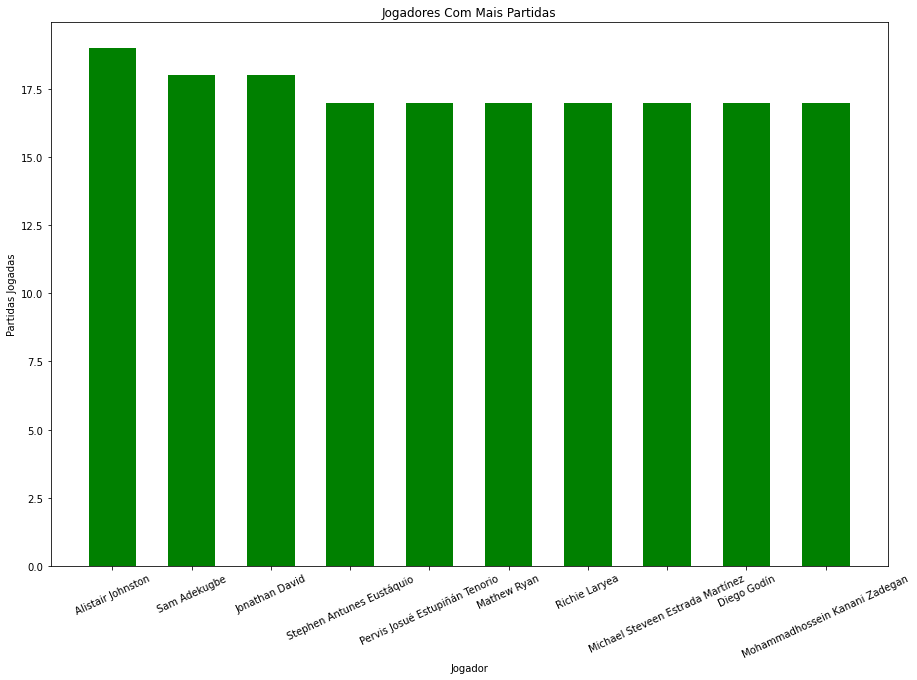

In [73]:
fig = plt.figure(figsize=(15,10))


plt.bar(name, app ,color = 'green',width = 0.6)
plt.xticks(rotation = 25)
plt.xlabel('Jogador')
plt.ylabel('Partidas Jogadas')
plt.title('Jogadores Com Mais Partidas')

plt.show()

In [74]:
#Aplicando padronização em 'minutes_played_overall'

df_final['appearances_overall'] = StandardScaler().fit_transform(df_final['appearances_overall'].values.reshape(len(df_final),1))

In [75]:
df_final[['full_name','appearances_overall']]

,full_name,appearances_overall
4,Abdallah Dipo Sima,-0.982486
15,Abdou Diallo,-0.200669
37,Abdul Fatawu Issahaku,-0.461275
41,Abdul Rahman Baba,-0.200669
60,Achraf Bencharki,-0.461275
...,...,...
508,Thiago Silva,1.362966
516,Vinícius José Paixão de Oliveira Júnior,0.320542
519,Wellington Moisés Ramírez Preciado,-0.982486
520,Weverton Pereira da Silva,-0.461275


# Premissa 6 - Cartões Vermelhos e Amarelos

In [76]:
df_cards = df_final[['yellow_cards_overall', 'red_cards_overall','full_name']].groupby(['full_name']).sum().sort_values(['yellow_cards_overall', 'red_cards_overall'])
df_cards.reset_index(inplace = True)
df_cards

,full_name,yellow_cards_overall,red_cards_overall
0,Aaref Gholami,0,0
1,Aaron Mooy,0,0
2,Aaron Ramsdale,0,0
3,Aaron Suarez Zuñiga,0,0
4,Abdallah Dipo Sima,0,0
...,...,...,...
982,Enner Remberto Valencia Lastra,5,0
983,Moisés Isaac Caicedo Corozo,5,0
984,Nicolas Otamendi,5,0
985,Steven de Sousa Vitoria,5,0


In [77]:
#Aplicando padronização nas variáveis 'yellow_cards_overall' e 'red_cards_overall'
df_final['yellow_cards_overall'] = StandardScaler().fit_transform(df_final['yellow_cards_overall'].values.reshape(len(df_final),1))
df_final['red_cards_overall'] = StandardScaler().fit_transform(df_final['red_cards_overall'].values.reshape(len(df_final),1))

# Excluindo campos não utilizados

In [78]:
df_final['position'].unique()

array(['Forward', 'Defender', 'Goalkeeper', 'Midfielder'], dtype=object)

In [79]:
#Apenas vou comparar jogadores de linha
df_final2 = df_final[df_final['position'] != 'Goalkeeper']

In [80]:
#Pegando o dataframe com as colunas padronizadas que será o input para o K-Means
X = df_final2[['Faixa_Idade','goals_overall','Gols_Comparativo_Mais Gols Em Casa','Gols_Comparativo_Mais Gols Fora','goals_per_90_overall','minutes_played_overall','min_per_match','appearances_overall','yellow_cards_overall', 'red_cards_overall','assists_per_90_overall' , 'goals_involved_per_90_overall' ,'assists_overall', 'min_per_assist_overall']]

In [81]:
X

,Faixa_Idade,goals_overall,Gols_Comparativo_Mais Gols Em Casa,Gols_Comparativo_Mais Gols Fora,goals_per_90_overall,minutes_played_overall,min_per_match,appearances_overall,yellow_cards_overall,red_cards_overall,assists_per_90_overall,goals_involved_per_90_overall,assists_overall,min_per_assist_overall
4,1,-0.509759,1,0,-0.429679,-0.958989,-1.006313,-0.982486,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003
15,2,0.103069,1,0,0.055877,-0.018339,0.582094,-0.200669,0.475857,-0.119952,-0.372377,-0.162109,-0.503800,-0.474003
37,0,-0.509759,1,0,-0.429679,-0.468617,-0.132689,-0.461275,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003
41,2,-0.509759,1,0,-0.429679,0.216052,1.177747,-0.200669,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003
60,2,-0.509759,1,0,-0.429679,-1.085437,-2.118199,-0.461275,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1,-0.509759,1,0,-0.429679,0.826704,0.462964,0.841754,0.475857,-0.119952,-0.000404,-0.306255,0.540845,2.198172
497,3,-0.509759,1,0,-0.429679,-0.061516,1.177747,-0.461275,1.594120,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003
508,4,-0.509759,1,0,-0.429679,1.603896,0.860066,1.362966,0.475857,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003
516,1,0.103069,1,0,0.015414,0.080352,-0.092979,0.320542,1.594120,-0.119952,-0.372377,-0.190938,-0.503800,-0.474003


# Iniciando o Algorítmo K-Means

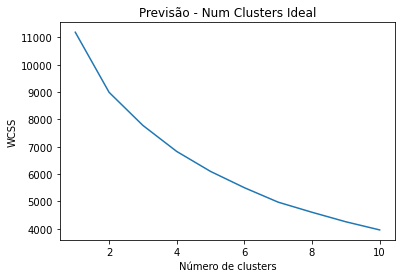

In [82]:
#Encontrando o Número Ideal de Clusters pelo método do cotovelo

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1,11),wcss) 
plt.title('Previsão - Num Clusters Ideal') 
plt.xlabel('Número de clusters') 
plt.ylabel('WCSS') 
plt.show()

In [83]:
df = df[df['position'] != 'Goalkeeper']


In [84]:
# Considerando 5 clusters
k_means_5 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)

k_means_5.fit_predict(X)
labels = k_means_5.labels_
df['Label_5'] = labels
df.head(10)

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Faixa_Idade,Label_5
4,Abdallah Dipo Sima,21,Forward,Senegal,69,8,61,Senegal,2,1,...,35,0,0,0.00,-1,-1,-1,23,1,0
15,Abdou Diallo,26,Defender,Senegal,374,180,194,France,5,2,...,75,374,0,0.24,92,404,95,10,2,1
37,Abdul Fatawu Issahaku,18,Forward,Ghana,228,169,59,Ghana,4,2,...,57,0,0,0.00,-1,-1,-1,7,0,0
41,Abdul Rahman Baba,28,Defender,Ghana,450,270,180,Ghana,5,3,...,90,0,0,0.00,236,199,32,34,2,1
60,Achraf Bencharki,27,Forward,Morocco,28,20,8,Morocco,4,3,...,7,0,0,0.00,-1,-1,-1,30,2,0
61,Achraf Hakimi Mouh,23,Defender,Morocco,622,270,352,Morocco,7,3,...,89,0,0,0.00,65,48,34,6,1,1
62,Adam Masina,28,Defender,Morocco,544,288,256,Italy,7,4,...,78,544,544,0.17,150,31,26,23,2,2
110,Aïssa Bilal Laïdouni,25,Defender,Tunisia,693,338,355,France,8,4,...,87,693,0,0.13,146,130,18,4,1,1
127,Alexander Djiku,28,Defender,Ghana,614,360,254,France,7,4,...,88,205,0,0.44,242,197,35,32,2,1
145,Ali Maâloul,32,Defender,Tunisia,720,360,360,Tunisia,8,4,...,90,720,0,0.13,143,134,16,7,3,1


In [85]:
# Pegando a média dos centroides de cada cluster
df[['Label_5','age','goals_overall','goals_per_90_overall','minutes_played_overall','min_per_match','appearances_overall','yellow_cards_overall', 'red_cards_overall','assists_per_90_overall' , 'goals_involved_per_90_overall' ,'assists_overall', 'min_per_assist_overall']].groupby(['Label_5']).mean()

,age,goals_overall,goals_per_90_overall,minutes_played_overall,min_per_match,appearances_overall,yellow_cards_overall,red_cards_overall,assists_per_90_overall,goals_involved_per_90_overall,assists_overall,min_per_assist_overall
Label_5,,,,,,,,,,,,
0,26.130977,0.251559,0.115509,160.972973,48.259875,3.413721,0.193347,0.0,0.069709,0.185281,0.164241,29.588358
1,28.041026,0.871795,0.144256,604.564103,76.153846,8.046154,1.261538,0.0,0.009436,0.153692,0.035897,9.892308
2,27.888889,2.505556,0.331000,740.744444,73.344444,10.127778,0.966667,0.0,0.246556,0.577222,1.822222,509.361111
3,28.076923,0.769231,0.110769,546.846154,68.692308,7.769231,2.384615,1.0,0.015385,0.126154,0.153846,34.461538
4,26.392157,1.313725,1.257059,114.529412,35.078431,3.509804,0.176471,0.0,1.133725,2.390000,1.137255,67.588235


In [86]:
#Quantos jogadores tem cada cluster
df['Label_5'].value_counts()

0    481
1    195
2    180
4     51
3     13
Name: Label_5, dtype: int64

In [88]:
X['Label_5'] = labels
X.head(10)

C:\Users\Soeiro\AppData\Local\Temp\ipykernel_10348\1534111542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Label_5'] = labels


,Faixa_Idade,goals_overall,Gols_Comparativo_Mais Gols Em Casa,Gols_Comparativo_Mais Gols Fora,goals_per_90_overall,minutes_played_overall,min_per_match,appearances_overall,yellow_cards_overall,red_cards_overall,assists_per_90_overall,goals_involved_per_90_overall,assists_overall,min_per_assist_overall,Label_5
4,1,-0.509759,1,0,-0.429679,-0.958989,-1.006313,-0.982486,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003,1
15,2,0.103069,1,0,0.055877,-0.018339,0.582094,-0.200669,0.475857,-0.119952,-0.372377,-0.162109,-0.503800,-0.474003,4
37,0,-0.509759,1,0,-0.429679,-0.468617,-0.132689,-0.461275,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003,1
41,2,-0.509759,1,0,-0.429679,0.216052,1.177747,-0.200669,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003,4
60,2,-0.509759,1,0,-0.429679,-1.085437,-2.118199,-0.461275,-0.642406,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003,1
61,1,0.715898,1,0,0.157035,0.746517,1.138037,0.320542,-0.642406,-0.119952,-0.372377,-0.090036,-0.503800,-0.474003,4
62,2,-0.509759,1,0,-0.429679,0.505958,0.701225,0.320542,0.475857,-0.119952,0.079305,-0.263011,0.540845,1.769304,2
110,1,0.103069,1,0,-0.166669,0.965488,1.058617,0.581148,0.475857,-0.119952,-0.372377,-0.320669,-0.503800,-0.474003,4
127,2,-0.509759,1,0,-0.429679,0.721844,1.098327,0.320542,2.712383,-0.119952,-0.372377,-0.508058,-0.503800,-0.474003,4
145,3,0.103069,1,0,-0.166669,1.048759,1.177747,0.581148,0.475857,-0.119952,-0.372377,-0.320669,-0.503800,-0.474003,4


# Analisando cada label separadamente

# 1° - Participações em Gols

In [89]:
df['Faixa_Idade'] = le.inverse_transform(df['Faixa_Idade'])

In [90]:
df

,full_name,age,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,...,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Faixa_Idade,Label_5
4,Abdallah Dipo Sima,21,Forward,Senegal,69,8,61,Senegal,2,1,...,35,0,0,0.00,-1,-1,-1,23,"(20, 25]",1
15,Abdou Diallo,26,Defender,Senegal,374,180,194,France,5,2,...,75,374,0,0.24,92,404,95,10,"(25, 30]",4
37,Abdul Fatawu Issahaku,18,Forward,Ghana,228,169,59,Ghana,4,2,...,57,0,0,0.00,-1,-1,-1,7,"(15, 20]",1
41,Abdul Rahman Baba,28,Defender,Ghana,450,270,180,Ghana,5,3,...,90,0,0,0.00,236,199,32,34,"(25, 30]",4
60,Achraf Bencharki,27,Forward,Morocco,28,20,8,Morocco,4,3,...,7,0,0,0.00,-1,-1,-1,30,"(25, 30]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Ronald Federico Araújo da Silva,23,Defender,Uruguay,648,305,343,Uruguay,9,5,...,72,648,648,0.14,140,51,41,29,"(20, 25]",2
497,Sebastián Coates Nión,32,Defender,Uruguay,360,90,270,Uruguay,4,1,...,90,180,0,0.50,135,133,75,36,"(30, 35]",4
508,Thiago Silva,38,Defender,Brazil,900,521,379,Brazil,11,6,...,82,900,0,0.10,174,182,18,31,"(35, 40]",4
516,Vinícius José Paixão de Oliveira Júnior,22,Forward,Brazil,406,180,226,Brazil,7,3,...,58,203,0,0.44,47,114,-1,11,"(20, 25]",4


In [91]:
gols_tot_label = df[['goals_overall','Label_5']].groupby(['Label_5']).sum()
gols_tot_label.reset_index(inplace = True)
gols_tot_label

,Label_5,goals_overall
0,0,149
1,1,96
2,2,394
3,3,10
4,4,170


In [92]:
goals_per_90 = df[['goals_per_90_overall','Label_5']].groupby(['Label_5']).sum()
goals_per_90.reset_index(inplace = True)
goals_per_90

,Label_5,goals_per_90_overall
0,0,89.75
1,1,41.60
2,2,47.94
3,3,1.44
4,4,28.09


In [110]:
df_media_gols = df[['Label_5','goals_overall','goals_per_90_overall', 'goals_involved_per_90_overall' ]].groupby(['Label_5']).mean()
df_media_gols.reset_index(inplace = True)
df_media_gols

,Label_5,goals_overall,goals_per_90_overall,goals_involved_per_90_overall
0,0,1.960526,1.180921,2.040658
1,1,0.206009,0.089270,0.153541
2,2,2.317647,0.282000,0.519059
3,3,0.769231,0.110769,0.126154
4,4,0.871795,0.144051,0.153846


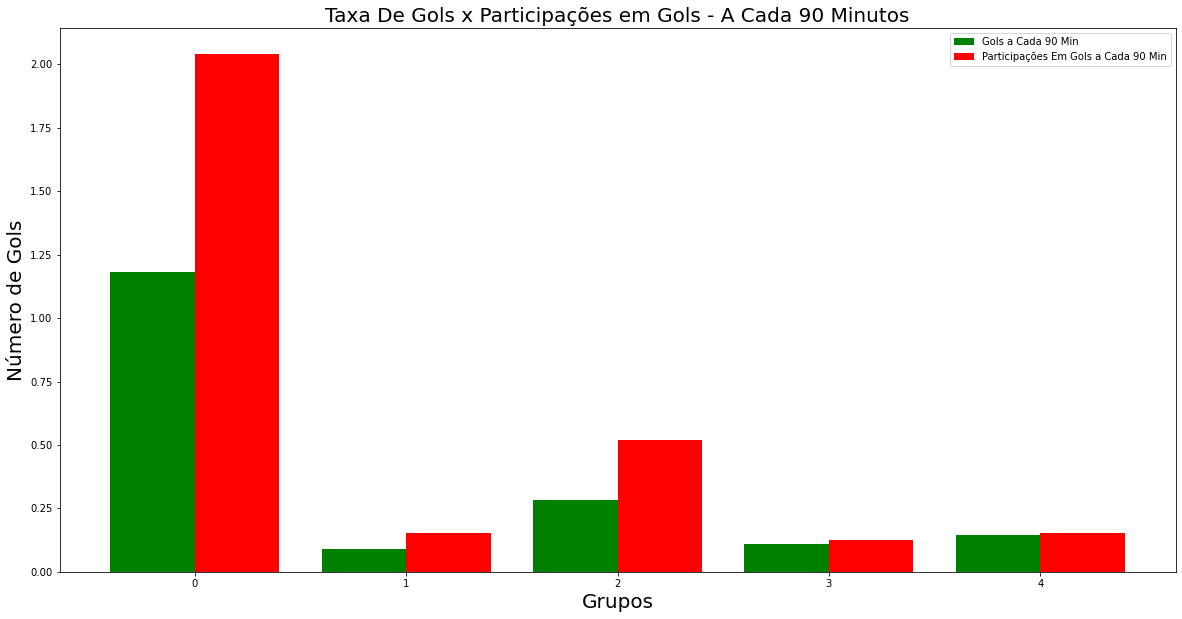

In [111]:
fig = plt.figure(figsize=(20,10))


X_axis = np.arange(len(df_media_gols))


plt.bar(X_axis - 0.2,df_media_gols['goals_per_90_overall'],color ='green',width=0.4,label = 'Gols a Cada 90 Min')
plt.bar(X_axis + 0.2,df_media_gols['goals_involved_per_90_overall'],color ='red',width=0.4,label = 'Participações Em Gols a Cada 90 Min')

plt.xticks(X_axis, df_media_gols['Label_5'])
plt.xlabel("Grupos",fontsize = 20)
plt.ylabel("Número de Gols",fontsize = 20)
plt.title("Taxa De Gols x Participações em Gols - A Cada 90 Minutos",fontsize = 20)
plt.legend()
plt.show()

# Premissa 2 - Minutos Jogados

In [93]:
minutes = df[['minutes_played_overall','Label_5']].groupby(['Label_5']).mean()
minutes.reset_index(inplace = True)
minutes

,Label_5,minutes_played_overall
0,0,166.934211
1,1,160.768240
2,2,759.188235
3,3,546.846154
4,4,604.235897


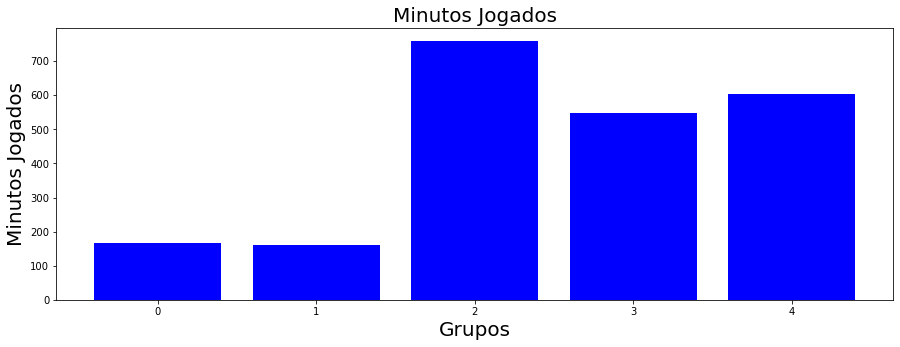

In [94]:
fig = plt.figure(figsize=(15,5))
plt.bar(minutes['Label_5'],minutes['minutes_played_overall'],color ='blue',label = 'Minutos Jogados - Total')
plt.xlabel("Grupos",fontsize = 20)
plt.ylabel("Minutos Jogados",fontsize = 20)
plt.title("Minutos Jogados",fontsize = 20)
plt.show()

# Gols Marcados

In [97]:
df_goals = df[['Label_5','goals_overall','goals_per_90_overall', 'goals_involved_per_90_overall' ]].groupby(['Label_5']).sum()
df_goals.reset_index(inplace = True)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


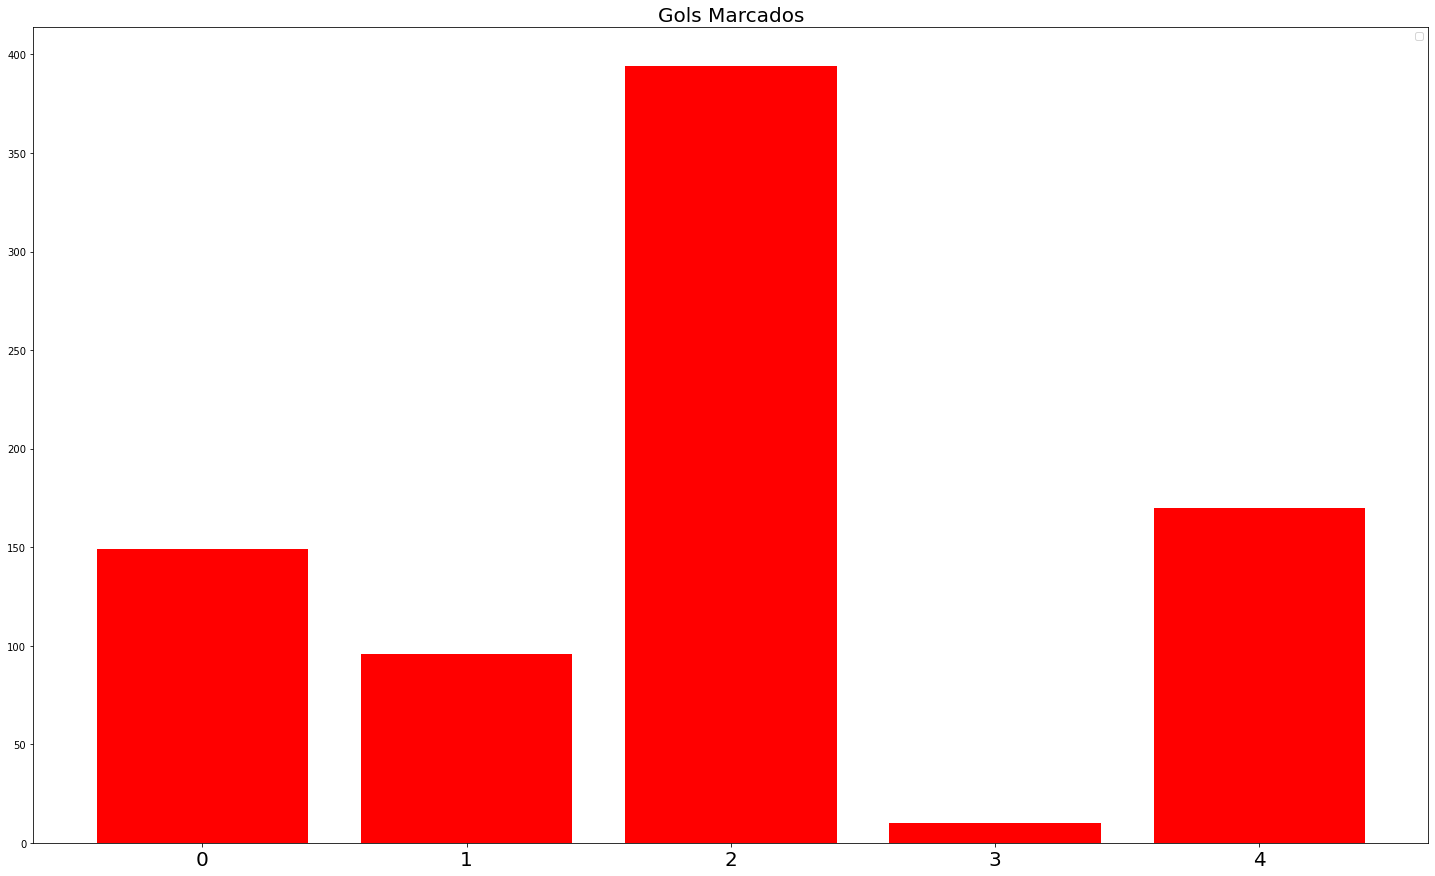

In [98]:
fig = plt.figure(figsize=(25,15))

plt.bar(df_goals['Label_5'],df_goals['goals_overall'] ,color ='red')
plt.xticks(fontsize=20)
plt.title('Gols Marcados', fontsize = 20)
plt.legend()

plt.show()

# Assistências

In [99]:

df_assits = df[['Label_5','assists_per_90_overall']].groupby(['Label_5']).mean()
df_assits.reset_index(inplace = True)
df_assits

,Label_5,assists_per_90_overall
0,0,0.860395
1,1,0.064227
2,2,0.237235
3,3,0.015385
4,4,0.009846


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


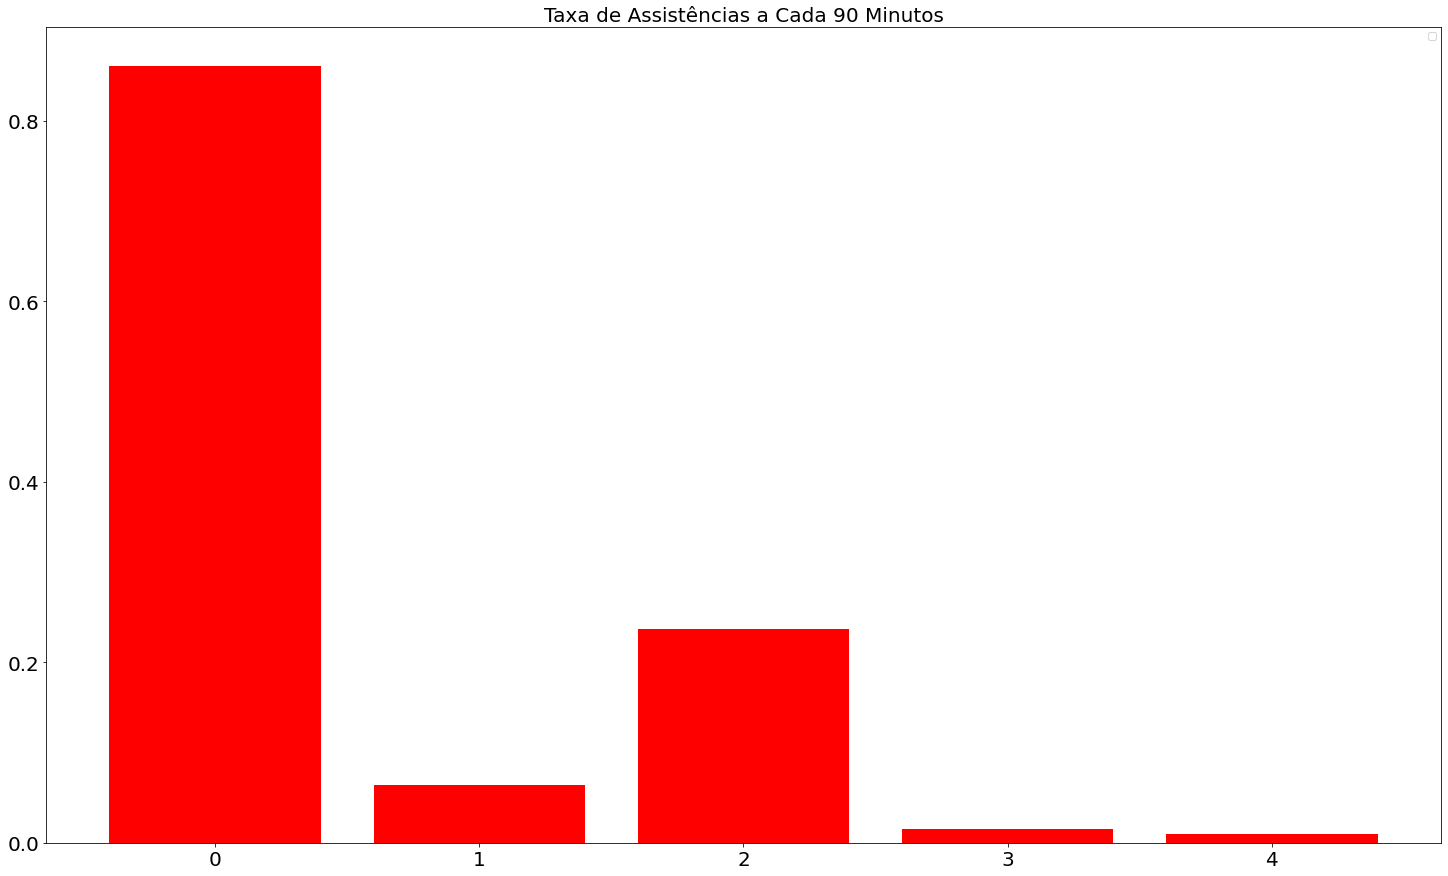

In [100]:
fig = plt.figure(figsize=(25,15))

plt.bar(df_assits['Label_5'],df_assits['assists_per_90_overall'] ,color ='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Taxa de Assistências a Cada 90 Minutos', fontsize = 20)
plt.legend()

plt.show()

In [101]:
df_assits_over = df[['Label_5','assists_overall']].groupby(['Label_5']).mean()
df_assits_over.reset_index(inplace = True)
df_assits_over

,Label_5,assists_overall
0,0,1.092105
1,1,0.156652
2,2,1.817647
3,3,0.153846
4,4,0.035897


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


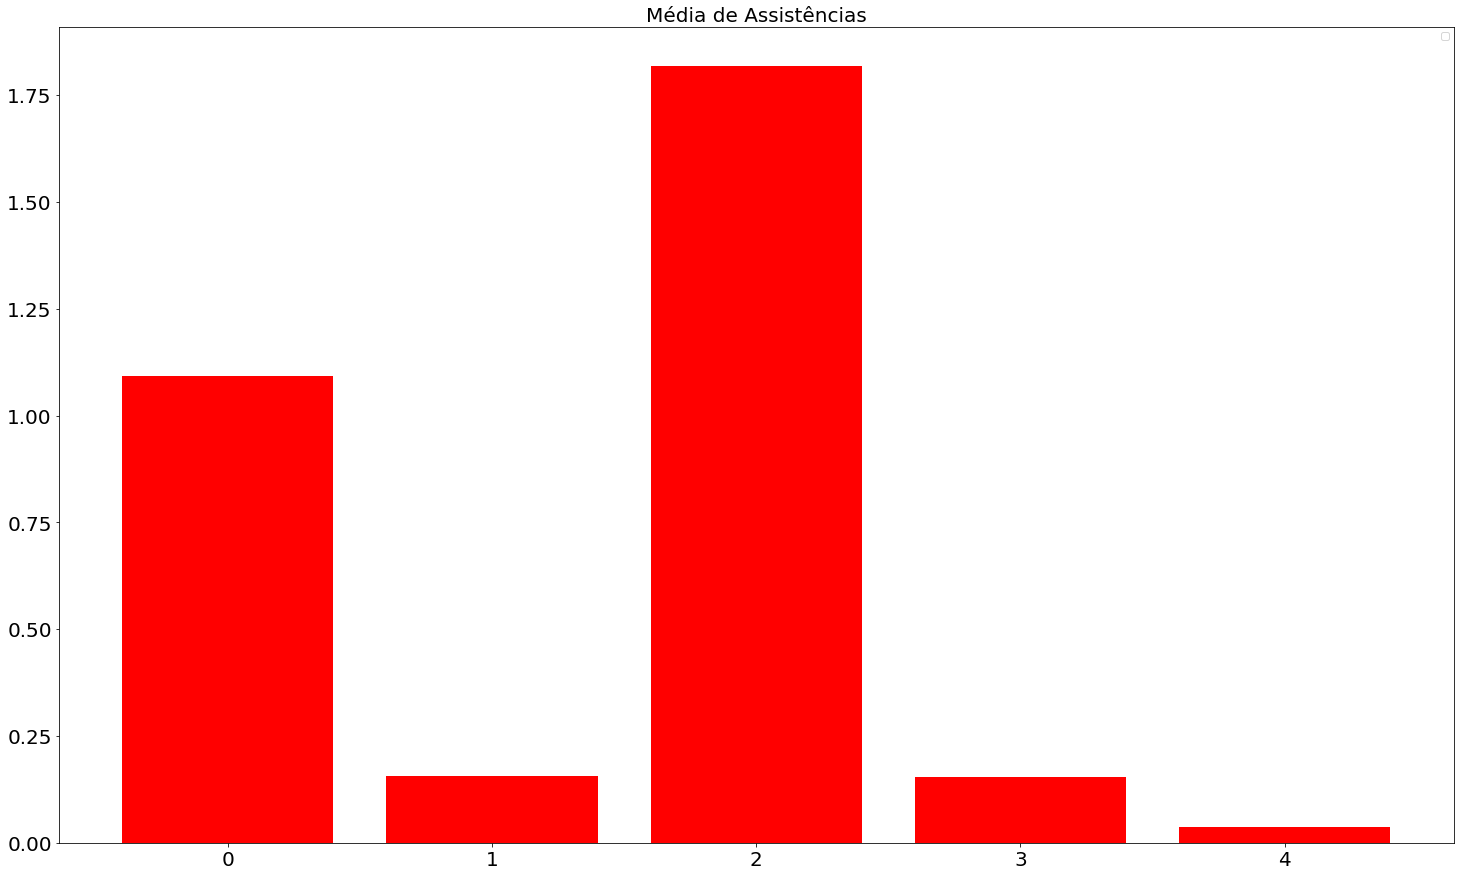

In [102]:
fig = plt.figure(figsize=(25,15))

plt.bar(df_assits_over['Label_5'],df_assits_over['assists_overall'] ,color ='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Média de Assistências', fontsize = 20)
plt.legend()

plt.show()

# Partidas Jogadas

In [103]:
df_app = df[['Label_5','appearances_overall']].groupby(['Label_5']).mean()
df_app.reset_index(inplace = True)
df_app

,Label_5,appearances_overall
0,0,4.118421
1,1,3.390558
2,2,10.352941
3,3,7.769231
4,4,8.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


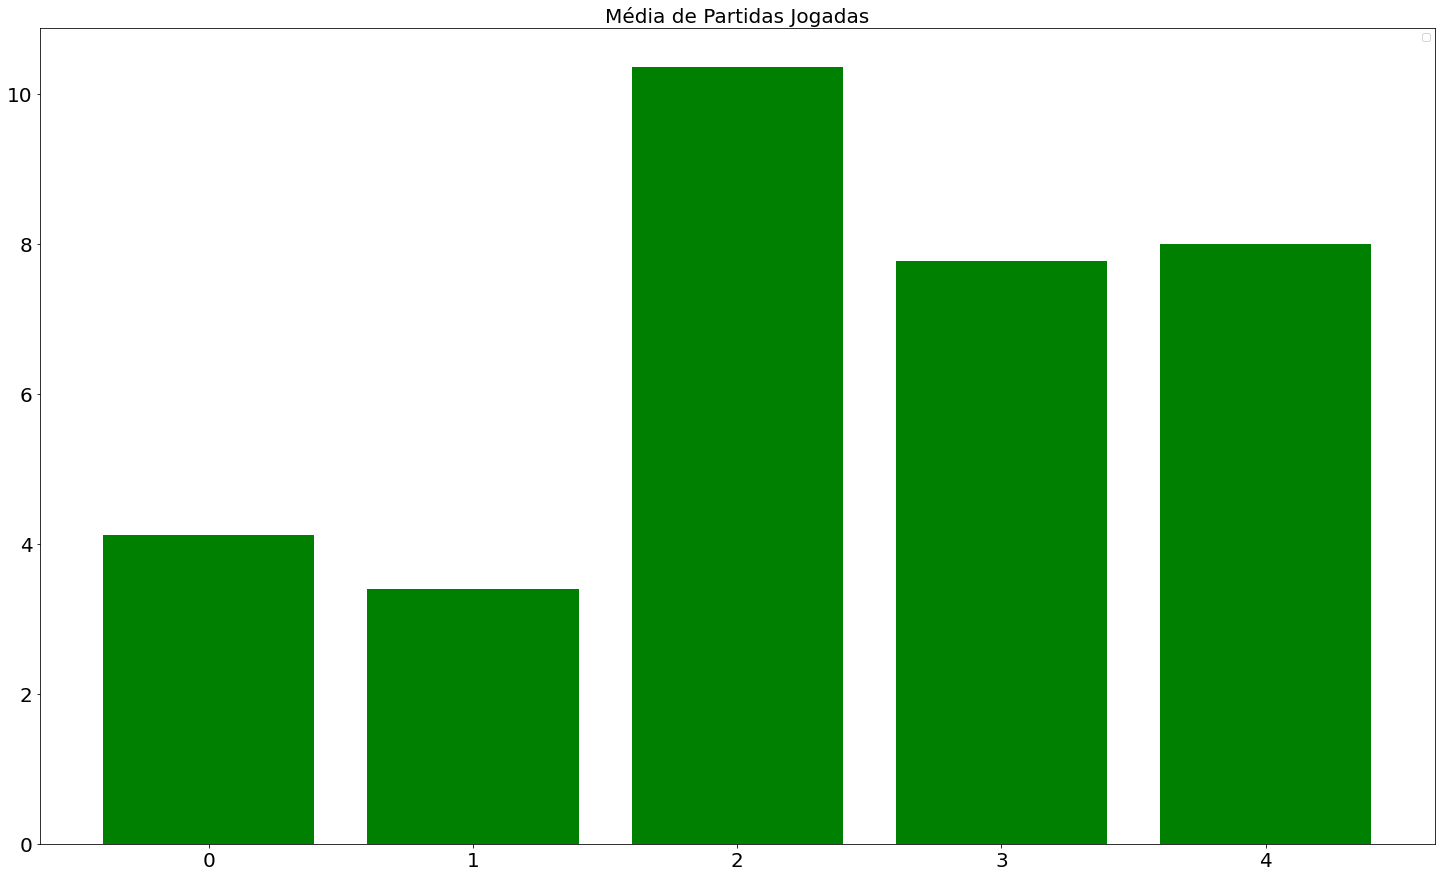

In [104]:
fig = plt.figure(figsize=(25,15))

plt.bar(df_app['Label_5'],df_app['appearances_overall'] ,color ='green')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Média de Partidas Jogadas', fontsize = 20)
plt.legend()

plt.show()

# Cartões Amarelos e Vermelhos

In [105]:
df_cards = df[['Label_5','yellow_cards_overall','red_cards_overall' ]].groupby(['Label_5']).mean()
df_cards.reset_index(inplace = True)
df_cards

,Label_5,yellow_cards_overall,red_cards_overall
0,0,0.328947,0.0
1,1,0.184549,0.0
2,2,0.976471,0.0
3,3,2.384615,1.0
4,4,1.256410,0.0


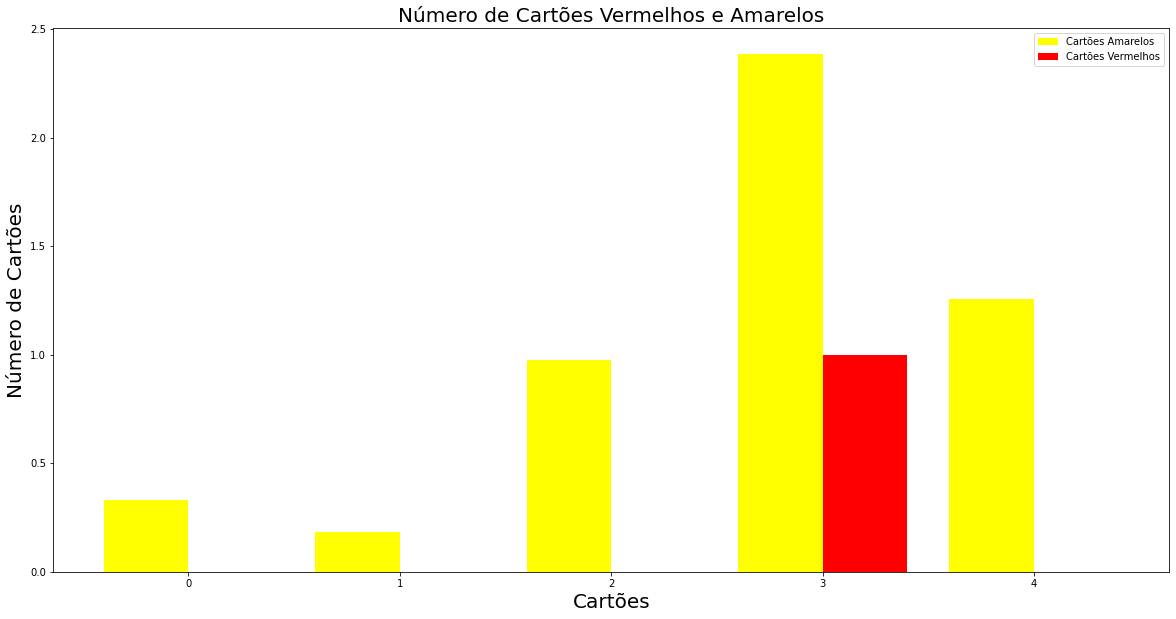

In [106]:
fig = plt.figure(figsize=(20,10))


X_axis = np.arange(len(df_cards))


plt.bar(X_axis - 0.2,df_cards['yellow_cards_overall'],color ='yellow',width=0.4,label = 'Cartões Amarelos')
plt.bar(X_axis + 0.2,df_cards['red_cards_overall'],color ='red',width=0.4,label = 'Cartões Vermelhos')

plt.xticks(X_axis,df_cards['Label_5'])
plt.xlabel("Cartões",fontsize = 20)
plt.ylabel("Número de Cartões",fontsize = 20)
plt.title("Número de Cartões Vermelhos e Amarelos",fontsize = 20)
plt.legend()
plt.show()